## Drawing board

In [8]:
from tkinter import *
from PIL import Image, ImageDraw
import os, glob

In [9]:
size = 8,8

for infile in glob.glob("*.png"):
    file, ext = os.path.splitext(infile)
    with Image.open(infile) as im:
        im.thumbnail(size)
        im.save(file + ".thumbnail", "PNG")

In [10]:
def paint(event):
    oval = []
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=20)
    oval.append((x1, y1, x2, y2))

def save():
    # Delete the previous image file
    if os.path.exists('drawing.png'):
        os.remove('drawing.png')

    # Create an Image object from the Canvas object
    width, height = canvas.winfo_width(), canvas.winfo_height()
    image = Image.new("L", (width, height),color="Black")
    draw = ImageDraw.Draw(image)
    for item in canvas.find_all():
        coords = canvas.coords(item)
        if canvas.type(item) == "oval":
            draw.ellipse(coords,fill="White",width=30000)

    # Save image
    image.save("drawing.png")

    # Exit the drawing window
    root.destroy()

def clear():
    if os.path.exists('drawing.png'):
        os.remove('drawing.png')
    # Delete the drawing part
    canvas.delete("all")

## Build model

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

In [12]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(kernel='rbf',gamma=0.0001)

clf.fit(data, digits.target)

SVC(gamma=0.0001)

## Test real-time hande writed

In [13]:
root = Tk()
root.title("Drawing Board")
root.configure(background = "grey")
canvas = Canvas(width=188,height=188)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

message = Label(root, text="Press and Drag the mouse to draw")
message.pack(side=BOTTOM)

save_button = Button(root, text="Save", command=save)
save_button.pack(side=TOP)

clear_button = Button(root, text="Clear", command=clear)
clear_button.pack(side=BOTTOM)

root.mainloop()

Number: 0


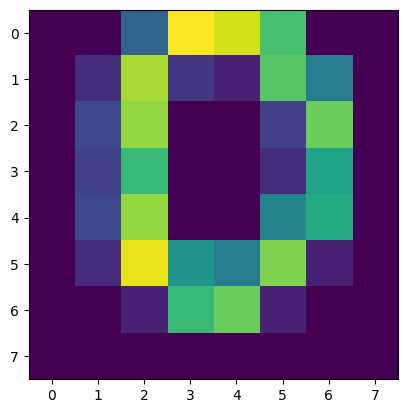

In [14]:
image = Image.open("drawing.png")
image.thumbnail((8,8))
a = np.asarray(image)
plt.imshow(a)
a = a.reshape(1,-1)
predict = clf.predict(a)
print("Number:",predict[0])